### European-Option-Analysis-in-Python
#### author: Yi Rong
#### update on 12/30/20

In [ ]:
from pandas_datareader.data import Options
import pandas as pd
import numpy as np
import scipy.stats as si
from datetime import date
from datetime import datetime
import math
import matplotlib.pyplot as plt

1&2. Data from Yahoo and Bloomberg

In [6]:
# download option data of multiple assets and save them in local
def OptionData(symbol):
    for sym in symbol:
        DATA_sym = Options(sym, 'yahoo').get_all_data()
        DATA_sym.to_csv('DATA2_' + sym + '.csv', sep = ',')

In [7]:
# run the fucntion within 3 symbols
symbol = ['AMZN', 'SPY', '^VIX']
OptionData(symbol)

In [3]:
# read data and modify them to a concise format

def DataProcessing(direction, date, Type):
    # direction: local direction, date: expiration date format as '2018-09-21', Type: 'call' or 'put'
    
    Symbol = pd.read_csv(direction)
    
    # extract data with expiration date and type
    Symbol_Type_Date = Symbol.loc[(Symbol['Expiry'] == date) & (Symbol['Type']  == Type)]
    
    # extract date for "at the money"
    Symbol_Type_Date = Symbol_Type_Date.loc[((Symbol_Type_Date['Underlying_Price'] / Symbol_Type_Date['Strike']) 
                       < 1.05) & ((Symbol_Type_Date['Underlying_Price'] / Symbol_Type_Date['Strike']) > 0.95)]
    return Symbol_Type_Date

In [4]:
data = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-09-21', 'put')

In [5]:
data

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
2966,1945.0,2018-09-21,put,AMZN180921P01945000,10.65,10.45,10.80,-4.000000,-27.303755,59.0,216.0,0.243507,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 18:49:30,"{'percentChange': -27.303755, 'contractSize': ..."
2989,1950.0,2018-09-21,put,AMZN180921P01950000,11.05,11.05,11.40,-4.500000,-28.938908,607.0,1862.0,0.240334,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:08:16,"{'percentChange': -28.938908, 'contractSize': ..."
3014,1955.0,2018-09-21,put,AMZN180921P01955000,12.20,11.90,12.20,-5.269999,-30.165997,82.0,188.0,0.238441,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:04:01,"{'percentChange': -30.165997, 'contractSize': ..."
3038,1960.0,2018-09-21,put,AMZN180921P01960000,13.00,13.30,13.60,-5.610001,-30.145084,332.0,428.0,0.240730,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 18:58:37,"{'percentChange': -30.145084, 'contractSize': ..."
3074,1965.0,2018-09-21,put,AMZN180921P01965000,14.00,14.15,14.60,-6.299999,-31.034481,70.0,168.0,0.239387,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:04:51,"{'percentChange': -31.034481, 'contractSize': ..."
3097,1970.0,2018-09-21,put,AMZN180921P01970000,15.35,15.40,15.80,-6.289999,-29.066540,135.0,386.0,0.239021,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:04:01,"{'percentChange': -29.06654, 'contractSize': '..."
3122,1975.0,2018-09-21,put,AMZN180921P01975000,16.53,16.60,17.00,-6.939999,-29.569658,314.0,426.0,0.238152,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:10:52,"{'percentChange': -29.569658, 'contractSize': ..."
3148,1980.0,2018-09-21,put,AMZN180921P01980000,17.34,17.85,18.25,-7.860001,-31.190480,303.0,489.0,0.237144,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:00:34,"{'percentChange': -31.19048, 'contractSize': '..."
3185,1985.0,2018-09-21,put,AMZN180921P01985000,18.85,19.10,19.45,-8.299999,-30.570900,79.0,177.0,0.235329,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:04:51,"{'percentChange': -30.5709, 'contractSize': 'R..."
3211,1990.0,2018-09-21,put,AMZN180921P01990000,20.60,20.75,21.10,-8.150000,-28.347826,325.0,328.0,0.235924,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:02:29,"{'percentChange': -28.347826, 'contractSize': ..."


5.BS Formulas

In [317]:
def EuropeanCall(S, K, T, r, sigma):
    # S: underlying price, K: strike price, T: time to maturity, r: short term interest rate, sigma: volatility
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call

def EuropeanPut(S, K, T, r, sigma):
    # S: underlying price, K: strike price, T: time to maturity, r: short term interest rate, sigma: volatility
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    
    return put

6.Bisection Method

In [318]:
def Bisection(func, low, high):
    # func: a function with only one parameter
    
    if ((func(low)) * (func(high)) > 0):
        return 'No root in this interval'
    else :        
        while (high - low) > 1e-6:
        
            midpoint = (low + high) / 2.0
        
            if ((func(low)) * (func(midpoint)) > 0):
                low = midpoint
       
            else:
                high = midpoint

        return midpoint

In [319]:
# calculate all the implied volatilities based on different strike prices and bid and ask prices
def IVList(data, downloaddate, low, high):
    # data: the output from the DataProcessing function, downloaddate: format as '2018-09-04', 
    # low: low in Bisection method, high: high in Bisection method
    
    IVList = [None] * len(data) # create a empty list for implied volatilities
    
    # redefine BS function, making it have only one parameter 
    # and return a difference between BS formula price and market price (average of bid and ask)
    def func_Put(x):
        yroot = EuropeanPut(S, K, T, r, x) - OP
        return yroot

    def func_Call(x):
        yroot = EuropeanCall(S, K, T, r, x) - OP
        return yroot
    
    # S, T, r are fixed in one dataset
    S = data['Underlying_Price'].values[0]        
    T = (datetime.strptime(data['Expiry'].values[0], '%Y-%m-%d') - datetime.strptime(downloaddate, '%Y-%m-%d')).days/365
    r = 1.92 / 100
    
    # obtain implied volatilities by inputing different strike prices and bid and ask prices
    if (data['Type'].values[0] == 'call'):
        for i in range(len(data)):
            K = data['Strike'].values[i]
            OP = (data['Bid'].values[i] + data['Ask'].values[i]) * 0.5
            IVList[i] = Bisection(func_Call, low, high)

    else:    
        for i in range(len(data)):
            K = data['Strike'].values[i]
            OP = (data['Bid'].values[i] + data['Ask'].values[i]) * 0.5
            IVList[i] = Bisection(func_Put, low, high)
  
    return IVList

In [193]:
data = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-09-21', 'put')
IVList = IVList(data, '2018-09-04', 0.2, 0.5)

In [91]:
np.mean(IVList)

0.2566073487444622

7.Implied Volatility Table

In [195]:
IV_AMZN_SEP_PUT = IVList

In [183]:
AMZN_SEP_CALL = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-09-21', 'call')
IV_AMZN_SEP_CALL = IVList(AMZN_SEP_CALL, '2018-09-04', 0.2, 0.5)

In [230]:
np.mean(IV_AMZN_SEP_CALL)

0.24548550582513576

In [184]:
AMZN_OCT_CALL = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-10-19', 'call')
IV_AMZN_OCT_CALL = IVList(AMZN_OCT_CALL, '2018-09-04', 0.15, 0.5)

In [231]:
np.mean(IV_AMZN_OCT_CALL)

0.2543237755938274

In [185]:
AMZN_OCT_PUT = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-10-19', 'put')
IV_AMZN_OCT_PUT = IVList(AMZN_OCT_PUT, '2018-09-04', 0.15, 0.8)

In [232]:
np.mean(IV_AMZN_OCT_PUT)

0.2687367065532788

In [186]:
AMZN_NOV_PUT = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-11-16', 'put')
IV_AMZN_NOV_PUT = IVList(AMZN_NOV_PUT, '2018-09-04', 0.15, 0.8)

In [233]:
np.mean(IV_AMZN_NOV_PUT)

0.30306912515221573

In [187]:
AMZN_NOV_CALL = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-11-16', 'call')
IV_AMZN_NOV_CALL = IVList(AMZN_NOV_CALL, '2018-09-04', 0.15, 0.8)

In [234]:
np.mean(IV_AMZN_NOV_CALL)

0.30635537984894545

In [326]:
SPY_SEP_CALL = DataProcessing('OptionData/DATA1_SPY.csv', '2018-09-21', 'call')
IV_SPY_SEP_CALL = IVList(SPY_SEP_CALL, '2018-09-04', -0.1, 0.2)

In [327]:
np.mean(IV_SPY_SEP_CALL)

0.10629183632986886

In [333]:
SPY_SEP_PUT = DataProcessing('OptionData/DATA1_SPY.csv', '2018-09-21', 'put')
IV_SPY_SEP_PUT = IVList(SPY_SEP_PUT, '2018-09-04', 0, 0.4)

In [334]:
np.mean(IV_SPY_SEP_PUT)

0.14491404942103797

In [361]:
SPY_OCT_PUT = DataProcessing('OptionData/DATA1_SPY.csv', '2018-10-19', 'put')
IV_SPY_OCT_PUT = IVList(SPY_OCT_PUT, '2018-09-04', 0, 0.4)

In [362]:
np.mean(IV_SPY_OCT_PUT)

0.12606714182886586

In [337]:
SPY_OCT_CALL = DataProcessing('OptionData/DATA1_SPY.csv', '2018-10-19', 'call')
IV_SPY_OCT_CALL = IVList(SPY_OCT_CALL, '2018-09-04', 0, 0.4)

In [338]:
np.mean(IV_SPY_OCT_CALL)

0.09084780462856952

In [339]:
SPY_NOV_CALL = DataProcessing('OptionData/DATA1_SPY.csv', '2018-11-16', 'call')
IV_SPY_NOV_CALL = IVList(SPY_NOV_CALL, '2018-09-04', 0, 0.4)

In [340]:
np.mean(IV_SPY_NOV_CALL)

0.10481759433088633

In [341]:
SPY_NOV_PUT = DataProcessing('OptionData/DATA1_SPY.csv', '2018-11-16', 'put')
IV_SPY_NOV_PUT = IVList(SPY_NOV_PUT, '2018-09-04', 0, 0.4)

In [342]:
np.mean(IV_SPY_NOV_PUT)

0.1308424268450056

In [216]:
IV_Dict = {'IV_AMZN_NOV_CALL':IV_AMZN_NOV_CALL, 'IV_AMZN_NOV_PUT':IV_AMZN_NOV_PUT}

In [217]:
pd.DataFrame(IV_Dict)

,IV_AMZN_NOV_CALL,IV_AMZN_NOV_PUT
0,0.314798,0.304369
1,0.312591,0.304937
2,0.313373,0.302470
3,0.310187,0.304168
4,0.312755,0.303227
5,0.313795,0.302120
6,0.311380,0.301505
7,0.312069,0.300863
8,0.309632,0.299908
9,0.308191,0.301791


In [224]:
IV_Dict = {'IV_SPY_OCT_CALL':IV_SPY_OCT_CALL, 'IV_SPY_OCT_PUT':IV_SPY_OCT_PUT}

In [225]:
pd.DataFrame(IV_Dict)

,IV_SPY_OCT_CALL,IV_SPY_OCT_PUT
0,0.111561,0.152712
1,0.118798,0.149467
2,0.114831,0.145341
3,0.109290,0.143020
4,0.105454,0.139079
5,0.102035,0.136385
6,0.104693,0.132914
7,0.098908,0.129882
8,0.100111,0.127332
9,0.096317,0.123528


In [243]:
data = DataProcessing('OptionData/DATA1_^VIX.csv', '2018-10-17', 'put')
data

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
100,13.0,2018-10-17,put,VIX181017P00013000,0.45,0.40,0.50,-0.02,-4.255321,56.0,170579.0,0.348639,VIX,True,^VIX,13.29,2018-09-04 19:13:08,2018-09-04 18:05:56,"{'percentChange': -4.2553215, 'contractSize': ..."
120,13.5,2018-10-17,put,VIX181017P00013500,0.68,0.65,0.75,0.03,4.615389,16.0,16175.0,0.344733,VIX,True,^VIX,13.29,2018-09-04 19:13:08,2018-09-04 18:10:55,"{'percentChange': 4.6153893, 'contractSize': '..."


In [9]:
data = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-09-21', 'put')
data

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
2966,1945.0,2018-09-21,put,AMZN180921P01945000,10.65,10.45,10.80,-4.000000,-27.303755,59.0,216.0,0.243507,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 18:49:30,"{'percentChange': -27.303755, 'contractSize': ..."
2989,1950.0,2018-09-21,put,AMZN180921P01950000,11.05,11.05,11.40,-4.500000,-28.938908,607.0,1862.0,0.240334,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:08:16,"{'percentChange': -28.938908, 'contractSize': ..."
3014,1955.0,2018-09-21,put,AMZN180921P01955000,12.20,11.90,12.20,-5.269999,-30.165997,82.0,188.0,0.238441,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:04:01,"{'percentChange': -30.165997, 'contractSize': ..."
3038,1960.0,2018-09-21,put,AMZN180921P01960000,13.00,13.30,13.60,-5.610001,-30.145084,332.0,428.0,0.240730,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 18:58:37,"{'percentChange': -30.145084, 'contractSize': ..."
3074,1965.0,2018-09-21,put,AMZN180921P01965000,14.00,14.15,14.60,-6.299999,-31.034481,70.0,168.0,0.239387,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:04:51,"{'percentChange': -31.034481, 'contractSize': ..."
3097,1970.0,2018-09-21,put,AMZN180921P01970000,15.35,15.40,15.80,-6.289999,-29.066540,135.0,386.0,0.239021,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:04:01,"{'percentChange': -29.06654, 'contractSize': '..."
3122,1975.0,2018-09-21,put,AMZN180921P01975000,16.53,16.60,17.00,-6.939999,-29.569658,314.0,426.0,0.238152,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:10:52,"{'percentChange': -29.569658, 'contractSize': ..."
3148,1980.0,2018-09-21,put,AMZN180921P01980000,17.34,17.85,18.25,-7.860001,-31.190480,303.0,489.0,0.237144,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:00:34,"{'percentChange': -31.19048, 'contractSize': '..."
3185,1985.0,2018-09-21,put,AMZN180921P01985000,18.85,19.10,19.45,-8.299999,-30.570900,79.0,177.0,0.235329,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:04:51,"{'percentChange': -30.5709, 'contractSize': 'R..."
3211,1990.0,2018-09-21,put,AMZN180921P01990000,20.60,20.75,21.10,-8.150000,-28.347826,325.0,328.0,0.235924,AMZN,False,AMZN,2042.11,2018-09-04 19:28:27,2018-09-04 19:02:29,"{'percentChange': -28.347826, 'contractSize': ..."


8.Put-Call Parity

In [316]:
def PutCalLParity(data, downloaddate):
    # data: the output from the DataProcessing function, downloaddate: format as '2018-09-04'
    
    St = data['Underlying_Price'].values[0] # underlying price
    
    T = (datetime.strptime(data['Expiry'].values[0], '%Y-%m-%d') - datetime.strptime(downloaddate, '%Y-%m-%d')).days/365
    PtT = math.exp(-0.0192 * T) # zero coupon bond price
    
    if (data['Type'].values[0] == 'put'):
        
        Ct = [None] * len(data)
        
        for i in range(len(data)):
            Pt = (data['Bid'].values[i] + data['Bid'].values[i]) * 0.5 # average the bid and ask
            K = data['Strike'].values[i] # strike price
            Ct[i] = St - K * PtT + Pt # obtain theoretical price
    
        return Ct
    
    else :
        
        Pt = [None] * len(data)
        
        for i in range(len(data)):
            Ct = (data['Bid'].values[i] + data['Bid'].values[i]) * 0.5 # average the bid and ask
            K = data['Strike'].values[i] # strike price
            Pt[i] = St - K * PtT + Ct # obtain theoretical price
    
        return Pt

In [38]:
data = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-09-21', 'put')
AMZN_SEP_Call_Theo = PutCalLParity(data, '2018-09-04')

In [39]:
data = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-09-21', 'call')
AMZN_SEP_Call_Real = (data['Bid'] + data['Ask']) * 0.5

In [40]:
PutCallDict = {'AMZN_SEP_Call_Theo':AMZN_SEP_Call_Theo, 'AMZN_SEP_Call_Real':AMZN_SEP_Call_Real}
pd.DataFrame(PutCallDict)

,AMZN_SEP_Call_Real,AMZN_SEP_Call_Theo
2965,110.200,109.298532
2988,106.275,104.903001
3013,102.125,100.757471
3037,97.925,97.161940
3073,93.525,93.016409
3096,89.750,89.270878
3121,86.375,85.475348
3147,82.275,81.729817
3184,79.075,77.984286
3210,75.300,74.638755


In [42]:
data = DataProcessing('OptionData/DATA1_SPY.csv', '2018-09-21', 'put')
SPY_SEP_Call_Theo = PutCalLParity(data, '2018-09-04')

In [43]:
data = DataProcessing('OptionData/DATA1_SPY.csv', '2018-09-21', 'call')
SPY_SEP_Call_Real = (data['Bid'] + data['Ask']) * 0.5

In [45]:
PutCallDict = {'SPY_SEP_Call_Theo':SPY_SEP_Call_Theo, 'SPY_SEP_Call_Real':SPY_SEP_Call_Real}
pd.DataFrame(PutCallDict)

,SPY_SEP_Call_Real,SPY_SEP_Call_Theo
2401,14.555,14.411702
2437,13.575,13.472596
2465,11.195,12.983043
2487,12.545,12.513489
2527,11.650,11.564383
2572,10.565,10.645277
2635,9.725,9.726171
2677,8.715,8.827065
2712,8.235,8.367512
2734,7.805,7.937959


9.Implied Volatility versus Strike K

In [56]:
AMZN_SEP_CALL = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-09-21', 'call')
IV_AMZN_SEP_CALL = IVList(AMZN_SEP_CALL, '2018-09-04', 0.2, 0.5)

In [57]:
AMZN_OCT_CALL = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-10-19', 'call')
IV_AMZN_OCT_CALL = IVList(AMZN_OCT_CALL, '2018-09-04', 0.15, 0.5)

In [58]:
AMZN_NOV_CALL = DataProcessing('OptionData/DATA1_AMZN.csv', '2018-11-16', 'call')
IV_AMZN_NOV_CALL = IVList(AMZN_NOV_CALL, '2018-09-04', 0.15, 0.8)

In [62]:
AMZN_Dict = {'Strike':AMZN_SEP_CALL['Strike'], 'IV_AMZN_SEP_CALL':IV_AMZN_SEP_CALL, 
             'IV_AMZN_OCT_CALL':IV_AMZN_OCT_CALL, 'IV_AMZN_NOV_CALL':IV_AMZN_NOV_CALL}

In [89]:
AMZN_IVmatrix = pd.DataFrame(AMZN_Dict).set_index('Strike')

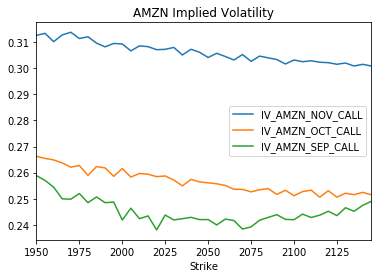

In [122]:
AMZN_IVmatrix.drop([1945]).plot()
plt.title('AMZN Implied Volatility')
plt.show()

In [112]:
SPY_SEP_CALL = DataProcessing('OptionData/DATA1_SPY.csv', '2018-09-21', 'call')
SPY_SEP_CALL = SPY_SEP_CALL.drop([2465, 2712, 3016, 3319, 3538, 3685])
IV_SPY_SEP_CALL = IVList(SPY_SEP_CALL, '2018-09-04', -0.1, 0.2)

In [113]:
SPY_OCT_CALL = DataProcessing('OptionData/DATA1_SPY.csv', '2018-10-19', 'call')
IV_SPY_OCT_CALL = IVList(SPY_OCT_CALL, '2018-09-04', 0, 0.4)

In [114]:
SPY_NOV_CALL = DataProcessing('OptionData/DATA1_SPY.csv', '2018-11-16', 'call')
IV_SPY_NOV_CALL = IVList(SPY_NOV_CALL, '2018-09-04', 0, 0.4)

In [115]:
SPY_Dict = {'Strike':SPY_SEP_CALL['Strike'], 'IV_SPY_SEP_CALL':IV_SPY_SEP_CALL, 
             'IV_SPY_OCT_CALL':IV_SPY_OCT_CALL, 'IV_SPY_NOV_CALL':IV_SPY_NOV_CALL}

In [ ]:
SPY_IVmatrix = pd.DataFrame(SPY_Dict).set_index('Strike')

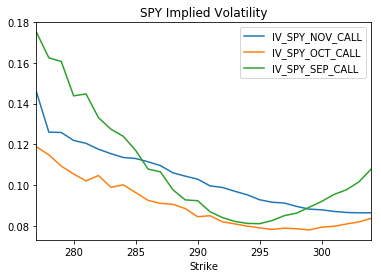

In [121]:
SPY_IVmatrix.drop([276]).plot()
plt.title('SPY Implied Volatility')
plt.show()

In [349]:
SPY_SEP_PUT = DataProcessing('OptionData/DATA1_SPY.csv', '2018-09-21', 'put')
SPY_SEP_PUT = SPY_SEP_PUT.drop([2466, 2713, 3017, 3320, 3539, 3686, 3709])
IV_SPY_SEP_PUT = IVList(SPY_SEP_PUT, '2018-09-04', 0, 0.4)

In [363]:
SPY_OCT_PUT = DataProcessing('OptionData/DATA1_SPY.csv', '2018-10-19', 'put')
SPY_OCT_PUT = SPY_OCT_PUT.drop([3713])
IV_SPY_OCT_PUT = IVList(SPY_OCT_PUT, '2018-09-04', 0, 0.4)

In [365]:
SPY_NOV_PUT = DataProcessing('OptionData/DATA1_SPY.csv', '2018-11-16', 'put')
IV_SPY_NOV_PUT = IVList(SPY_NOV_PUT, '2018-09-04', 0, 0.4)

In [366]:
SPY_Dict_PUT = {'Strike':SPY_OCT_PUT['Strike'], 'IV_SPY_SEP_PUT':IV_SPY_SEP_PUT, 
             'IV_SPY_OCT_PUT':IV_SPY_OCT_PUT, 'IV_SPY_NOV_PUT':IV_SPY_NOV_PUT}

In [370]:
SPY_IVmatrix_PUT = pd.DataFrame(SPY_Dict_PUT).set_index('Strike').drop([302, 303])

In [371]:
SPY_IVmatrix_PUT

,IV_SPY_NOV_PUT,IV_SPY_OCT_PUT,IV_SPY_SEP_PUT
Strike,,,
276.0,0.156934,0.152712,0.170007
277.0,0.154772,0.149467,0.165890
278.0,0.152471,0.145341,0.160200
279.0,0.148827,0.143020,0.154382
280.0,0.146384,0.139079,0.150216
281.0,0.143664,0.136385,0.145515
282.0,0.141552,0.132914,0.140569
283.0,0.139228,0.129882,0.135575
284.0,0.135946,0.127332,0.130643


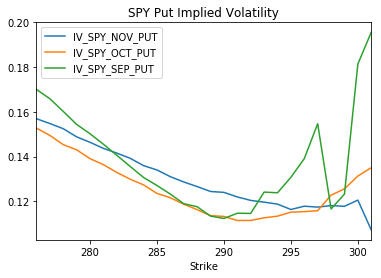

In [372]:
SPY_IVmatrix_PUT.plot()
plt.title('SPY Put Implied Volatility')
plt.show()

10.Greeks

In [213]:
data = DataProcessing('OptionData/DATA1_SPY.csv', '2018-09-21', 'call')
delta_BS = [None] * len(data) # empty list for delta calculated by BS formula
delta_PD = [None] * len(data) # empty lsit for dalta calculated by partial derivatives

In [214]:
S = data['Underlying_Price'].values[0]        
T = (datetime.strptime(data['Expiry'].values[0], '%Y-%m-%d') - datetime.strptime('2018-09-04', '%Y-%m-%d')).days/365
r = 1.92 / 100

# obtain a list of delta_BS
for i in range(len(data)):
    K = data['Strike'].values[i]
    sigma = IV_SPY_SEP_CALL[i]
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)) # d1 in BS formula
    delta_BS[i] = si.norm.cdf(d1, 0.0, 1.0) # delta = N(d1)

In [219]:
# obtain a list of delta_PD
for i in range(len(data)):
    K = data['Strike'].values[i]
    sigma = IV_SPY_SEP_CALL[i]
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    call1 = EuropeanCall(S, K, T, r, sigma)
    call2 = EuropeanCall((S + 0.001), K, T, r, sigma)
    delta_PD[i] = (call2 - call1) / 0.001 # delta = (C(S + 0.001) - C(S)) / 0.001

In [220]:
delta_Dict = {'delta_BS':delta_BS, 'delta_PD':delta_PD}
pd.DataFrame(delta_Dict)

,delta_BS,delta_PD
0,0.898223,0.898230
1,0.891286,0.891294
2,1.000000,1.000000
3,0.889375,0.889385
4,0.871372,0.871383
5,0.874257,0.874268
6,0.847371,0.847384
7,0.838585,0.838599
8,0.830684,0.830700
9,0.816617,0.816634


In [222]:
data = DataProcessing('OptionData/DATA1_SPY.csv', '2018-09-21', 'call')
vega_BS = [None] * len(data) # empty list for vega calculated by BS formula
vega_PD = [None] * len(data) # empty lsit for vega calculated by partial derivatives

In [223]:
S = data['Underlying_Price'].values[0]        
T = (datetime.strptime(data['Expiry'].values[0], '%Y-%m-%d') - datetime.strptime('2018-09-04', '%Y-%m-%d')).days/365
r = 1.92 / 100

# obtain a list of vega_BS
for i in range(len(data)):
    K = data['Strike'].values[i]
    sigma = IV_SPY_SEP_CALL[i]
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)) # d1 in BS formula
    N_deri = 1/(np.sqrt(2 * np.pi)) * np.exp(- (d1)**2 / 2 ) # N'(d1)
    vega_BS[i] = N_deri * np.sqrt(T) * S # vega_BS = N'(d1) * squrt(T) * S

In [230]:
# obtain a list of vega_PD
for i in range(len(data)):
    K = data['Strike'].values[i]
    sigma = IV_SPY_SEP_CALL[i]
    call1 = EuropeanCall(S, K, T, r, sigma)
    call2 = EuropeanCall(S, K, T, r, (sigma + 0.001))
    vega_PD[i] = (call2 - call1) / 0.001 # vega_PD = (C(sigma + 0.001) - C(sigma)) / 0.001

In [232]:
vega_Dict = {'vega_BS':vega_BS, 'vega_PD':vega_PD}
pd.DataFrame(vega_Dict)

,vega_BS,vega_PD
0,11.115918,11.163311
1,11.659112,11.708083
2,0.000000,0.000000
3,11.805850,11.858488
4,13.131138,13.181792
5,12.925580,12.982853
6,14.749088,14.800766
7,15.302241,15.356513
8,15.782742,15.836902
9,16.600336,16.651470


In [233]:
data = DataProcessing('OptionData/DATA1_SPY.csv', '2018-09-21', 'call')
gamma_BS = [None] * len(data) # empty list for gamma calculated by BS formula
gamma_PD = [None] * len(data) # empty lsit for gamma calculated by partial derivatives

In [234]:
S = data['Underlying_Price'].values[0]        
T = (datetime.strptime(data['Expiry'].values[0], '%Y-%m-%d') - datetime.strptime('2018-09-04', '%Y-%m-%d')).days/365
r = 1.92 / 100

# obtain a list of gamma_BS
for i in range(len(data)):
    K = data['Strike'].values[i]
    sigma = IV_SPY_SEP_CALL[i]
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T)) # d1 in BS formula
    N_deri = 1/(np.sqrt(2 * np.pi)) * np.exp(- (d1)**2 / 2 ) # N'(d1)
    gamma_BS[i] = N_deri / (np.sqrt(T) * S * sigma) # vega_BS = N'(d1) / (squrt(T) * S * sigma)

In [238]:
# obtain a list of gamma_PD
for i in range(len(data)):
    K = data['Strike'].values[i]
    sigma = IV_SPY_SEP_CALL[i]
    call1 = EuropeanCall(S, K, T, r, sigma)
    call2 = EuropeanCall((S + 0.001), K, T, r, sigma)
    call3 = EuropeanCall((S + 0.002), K, T, r, sigma)
    gamma_PD[i] = (((call3 - call2) / 0.001) - ((call2 - call1) / 0.001)) / 0.001 # partial derivative for gamma

In [248]:
gamma_Dict = {'gamma_BS':gamma_BS, 'gamma_PD':gamma_PD}
pd.DataFrame(gamma_Dict)

,gamma_BS,gamma_PD
0,0.015516,1.551453e-02
1,0.017035,1.703344e-02
2,0.000000,5.684342e-08
3,0.018584,1.858191e-02
4,0.020901,2.089828e-02
5,0.022989,2.298549e-02
6,0.026057,2.605461e-02
7,0.029401,2.939709e-02
8,0.031332,3.132834e-02
9,0.033309,3.330473e-02
